In [160]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
men=Memory("./mycache")

In [161]:
#读取数据集
def get_data():
    data=load_svmlight_file('housing_scale')
    return data[0].todense(),data[1]

In [162]:
#读取数据
X,y=get_data()
y=np.reshape(y,(len(y),1))
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)
(n,m)=np.shape(X_train)
#加入一列，值为1
X_train=np.hstack((X_train,np.ones((n,1))))   
(n,m)=np.shape(X_test)
X_test=np.hstack((X_test,np.ones((n,1))))

In [163]:
(n,m)=np.shape(X_test)
w=np.zeros((m,1))

In [164]:
epoch=100                
times=range(epoch)   
loss_train=[]             
loss_test=[]             
alpha=0.001               

In [165]:
def squareloss(X,n,y):
    a=0
    y_predict=X*n         
    for i in range(0,len(y)):        
        a=a+(y_predict[i]-y[i])**2
    return a/(len(y))

In [166]:
def gradient(X,n,y,lam=0):     
    gra=X.T*(X*n-y)
    return gra

In [167]:
def LinearRegression(X,y,w,lamda,epoch,x1,y1,gradient=gradient,loss=squareloss):
    grad=0
    loss_train=[]
    loss_test=[]
    for i in range(epoch):
        grad=gradient(X,w,y,lamda)            
        w=w-alpha*grad                            
        loss_train.append(loss(X,w,y)[0,0])  
        loss_test.append(loss(x1,w,y1)[0,0])      
    return loss_train,loss_test

In [168]:
loss_train,loss_test=LinearRegression(X=X_train,y=y_train,w=w,lamda=0,epoch=epoch,x1=X_test,y1=y_test)

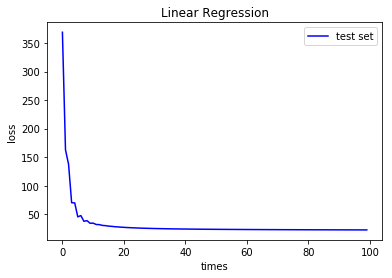

In [169]:
plt.xlabel('times')
plt.ylabel('loss')
plt.title("Linear Regression")
plt.plot(times,loss_test,label='test set',color='blue')
plt.legend()
plt.show()

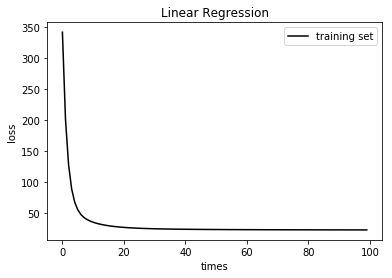

In [170]:
plt.xlabel('times')
plt.ylabel('loss')
plt.title("Linear Regression")
plt.plot(times,loss_train,label='training set',color='black')
plt.legend()
plt.show()

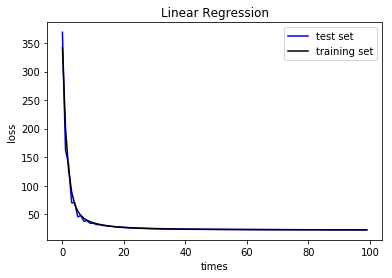

In [171]:
plt.xlabel('times')
plt.ylabel('loss')
plt.title("Linear Regression")
plt.plot(times,loss_test,label='test set',color='blue')
plt.plot(times,loss_train,label='training set',color='black')
plt.legend()
plt.show()

In [117]:
print(loss_train[-1])
print(loss_test[-1])

23.474921022
23.6754402416
